In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from BayesNet import BayesNet
import networkx as nx
import pandas as pd

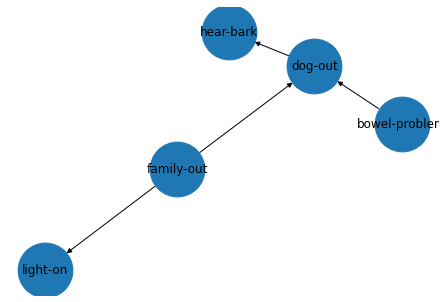

In [25]:
bn = BayesNet(verbose=3)
bn.load_from_bifxml('testing/dog_problem.BIFXML')
bn.draw_structure()

In [26]:
bn.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95,
 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99,
 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70,
 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99,
 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [5]:
# bn.prune_nodes(Q=set(['dog-out']), evidence=set(['bowel-problem']))

In [6]:
# bn.prune_edges(evidence=pd.Series({'dog-out': True}))

Pruning nodes
Deleting dog-out from graph
Pruning edges


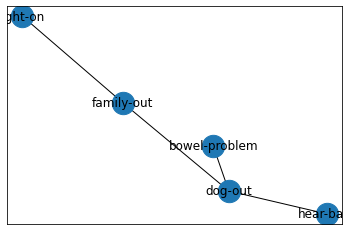

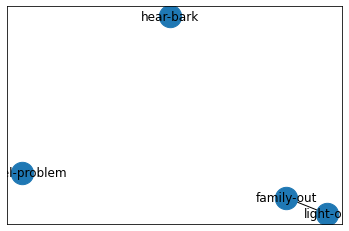

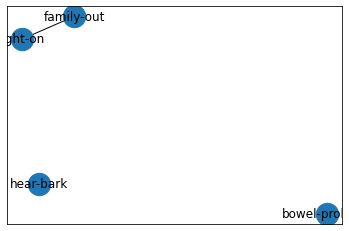

In [7]:
bn.prune_network(Q=set(['dog-out']), evidence=pd.Series({'dog-out': True}))

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: hear-bark
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out'], 'family-out': ['dog-out']}
var_to_elim: dog-out
neighbors_dict
 {'family-out': []}
var_to_elim: family-out


['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']

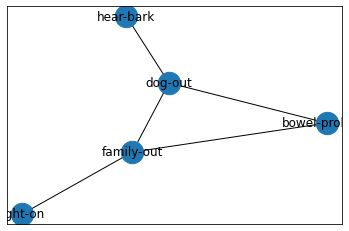

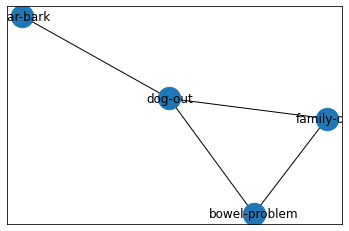

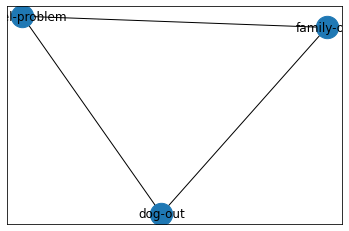

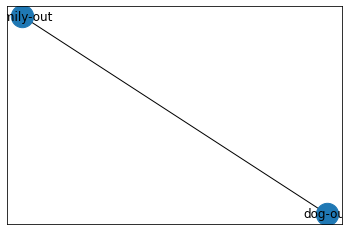

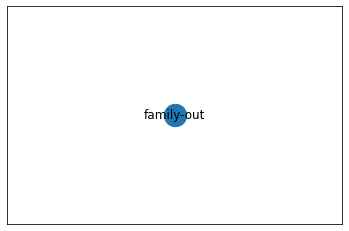

In [12]:
bn.min_degree_order()

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
neighbors_to_connect
 {'light-on': [], 'bowel-problem': [], 'dog-out': [('family-out', 'hear-bark'), ('bowel-problem', 'hear-bark')], 'hear-bark': [], 'family-out': [('light-on', 'bowel-problem'), ('light-on', 'dog-out')]}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
neighbors_to_connect
 {'bowel-problem': [], 'dog-out': [('family-out', 'hear-bark'), ('bowel-problem', 'hear-bark')], 'hear-bark': [], 'family-out': []}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['dog-out']}
neighbors_to_connect
 {'dog-out': [('family-out',

['light-on', 'bowel-problem', 'hear-bark', 'dog-out', 'family-out']

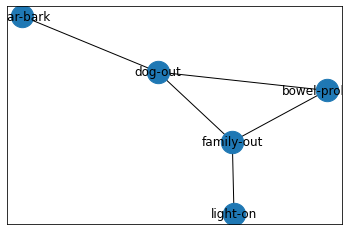

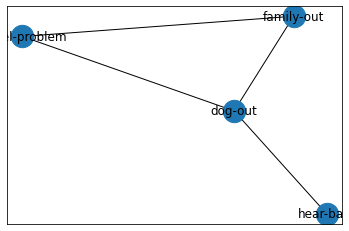

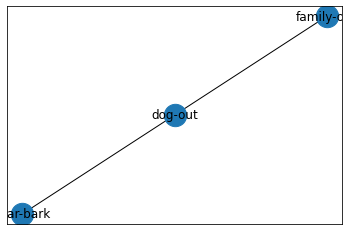

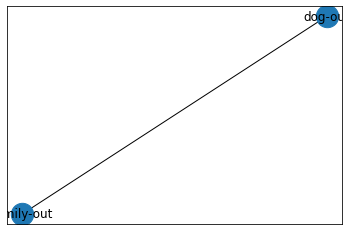

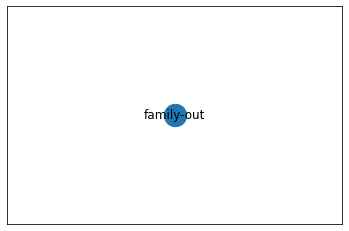

In [14]:
bn.min_fill_order()

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: hear-bark
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out'], 'family-out': ['dog-out']}
var_to_elim: dog-out
neighbors_dict
 {'family-out': []}
var_to_elim: family-out
processing light-on


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f_i


,family-out,p
0,False,1.0
1,True,1.0


S
 {'bowel-problem':    bowel-problem     p
0          False  0.01
1           True  0.99, 'dog-out':    family-out  bowel-problem  dog-out     p
0       False          False    False  0.99
1       False          False     True  0.01
2       False           True    False  0.97
3       False           True     True  0.03
4        True          False    False  0.90
5        True          False     True  0.10
6        True           True    False  0.30
7        True           True     True  0.70, 'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0}
processing bowel-problem


,bowel-problem,p
0,False,0.01
1,True,0.99


,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


f


,bowel-problem,family-out,dog-out,p
0,False,False,False,0.0099
1,False,False,True,0.0001
2,False,True,False,0.0090
3,False,True,True,0.0010
4,True,False,False,0.9603
5,True,False,True,0.0297
6,True,True,False,0.2970
7,True,True,True,0.6930


f_i


,family-out,dog-out,p
0,False,False,0.9702
1,False,True,0.0298
2,True,False,0.3060
3,True,True,0.6940


S
 {'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'bowel-problem*':    family-out  dog-out       p
0       False    False  0.9702
1       False     True  0.0298
2        True    False  0.3060
3        True     True  0.6940}
processing dog-out


,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


,family-out,dog-out,p
0,False,False,0.9702
1,False,True,0.0298
2,True,False,0.3060
3,True,True,0.6940


f


,dog-out,hear-bark,family-out,p
0,False,False,False,0.679140
1,False,False,True,0.214200
2,False,True,False,0.291060
3,False,True,True,0.091800
4,True,False,False,0.000298
5,True,False,True,0.006940
6,True,True,False,0.029502
7,True,True,True,0.687060


f_i


,hear-bark,family-out,p
0,False,False,0.679438
1,False,True,0.221140
2,True,False,0.320562
3,True,True,0.778860


S
 {'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'dog-out*':    hear-bark  family-out         p
0      False       False  0.679438
1      False        True  0.221140
2       True       False  0.320562
3       True        True  0.778860}
processing family-out


,family-out,p
0,False,0.15
1,True,0.85


,family-out,p
0,False,1.0
1,True,1.0


,hear-bark,family-out,p
0,False,False,0.679438
1,False,True,0.221140
2,True,False,0.320562
3,True,True,0.778860


f


,family-out,hear-bark,p
0,False,False,0.101916
1,False,True,0.048084
2,True,False,0.187969
3,True,True,0.662031


f_i


,hear-bark,p
0,False,0.289885
1,True,0.710115


S
 {'family-out*':    hear-bark         p
0      False  0.289885
1       True  0.710115}


,hear-bark,p
0,False,0.289885
1,True,0.710115


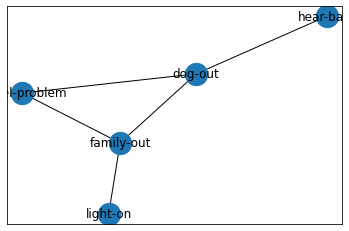

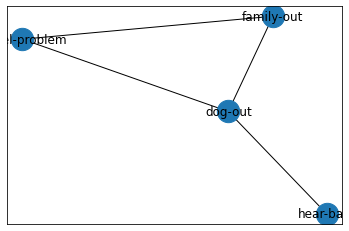

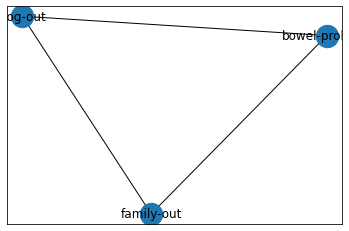

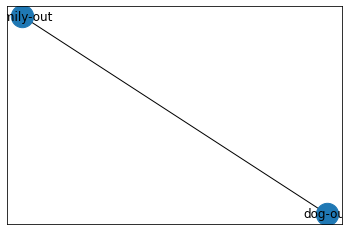

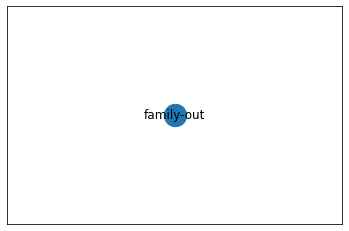

In [5]:
bn.variable_elimination(Q=set(['hear-bark']), order='min_degree_order')

In [19]:
bn.sum_out(bn.get_cpt('dog-out'), 'hear-bark')

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [28]:
ser = pd.Series({"bowel-problem": False, "problem": True})
ser['bowel-problem']

False

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: hear-bark
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out'], 'family-out': ['dog-out']}
var_to_elim: dog-out
neighbors_dict
 {'family-out': []}
var_to_elim: family-out
processing light-on


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f_i


,family-out,p
0,False,1.0
1,True,1.0


S
 {'bowel-problem':    bowel-problem     p
0          False  0.01, 'dog-out':    family-out  bowel-problem  dog-out     p
0       False          False    False  0.99
1       False          False     True  0.01
4        True          False    False  0.90
5        True          False     True  0.10, 'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0}
processing bowel-problem


,bowel-problem,p
0,False,0.01


,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
4,True,False,False,0.90
5,True,False,True,0.10


f


,bowel-problem,family-out,dog-out,p
0,False,False,False,0.0099
1,False,False,True,0.0001
2,False,True,False,0.0090
3,False,True,True,0.0010


f_i


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


S
 {'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'bowel-problem*':    family-out  dog-out       p
0       False    False  0.0099
1       False     True  0.0001
2        True    False  0.0090
3        True     True  0.0010}
processing dog-out


,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


f


,dog-out,hear-bark,family-out,p
0,False,False,False,0.006930
1,False,False,True,0.006300
2,False,True,False,0.002970
3,False,True,True,0.002700
4,True,False,False,0.000001
5,True,False,True,0.000010
6,True,True,False,0.000099
7,True,True,True,0.000990


f_i


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


S
 {'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'dog-out*':    hear-bark  family-out         p
0      False       False  0.006931
1      False        True  0.006310
2       True       False  0.003069
3       True        True  0.003690}
processing family-out


,family-out,p
0,False,0.15
1,True,0.85


,family-out,p
0,False,1.0
1,True,1.0


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


f


,family-out,hear-bark,p
0,False,False,0.001040
1,False,True,0.000460
2,True,False,0.005363
3,True,True,0.003136


f_i


,hear-bark,p
0,False,0.006403
1,True,0.003597


S
 {'family-out*':    hear-bark         p
0      False  0.006403
1       True  0.003597}


,hear-bark,p
0,False,0.640315
1,True,0.359685


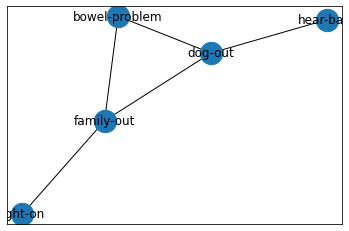

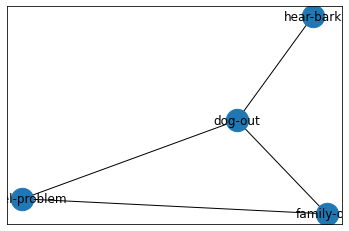

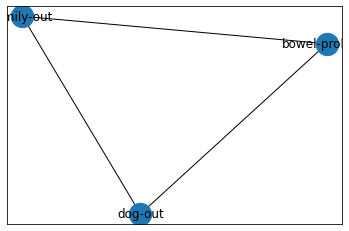

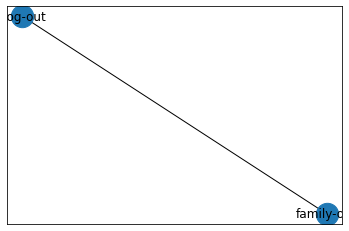

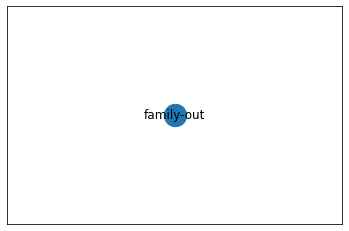

In [6]:
bn.variable_elimination(Q=set(['hear-bark']),
                        evidence=pd.Series({"bowel-problem": False}), 
                        order='min_degree_order')

In [19]:
# bn.multiply_factors(bn.get_cpt('family-out'), bn.get_cpt('light-on'))

In [9]:
# bn.d_separated('light-on', 'bowel-problem', ['hear-bark'])

In [9]:
marg_test_1_df = pd.DataFrame({
    "A": [True, True, False, False],
    "B": [True, False, True, False],
    "p": [.54, .06, .08, .32]
})
marg_test_1_df

,A,B,p
0,True,True,0.54
1,True,False,0.06
2,False,True,0.08
3,False,False,0.32


In [10]:
bn.sum_out(marg_test_1_df, 'B')

,A,p
0,False,0.4
1,True,0.6


In [14]:
# bn.reduce_factor(pd.Series({"bowel-problem": True}), bn.get_cpt('dog-out'))

In [19]:
pd.Series({"A": True})

A    True
dtype: bool

In [8]:
bn.structure.is_directed()

True

In [14]:
for path in nx.all_simple_paths(bn.structure_unidirected, 'bowel-problem', ['light-on', 'hear-bark']):
    print(path)

['bowel-problem', 'dog-out', 'hear-bark']
['bowel-problem', 'dog-out', 'family-out', 'light-on']


# Task 3

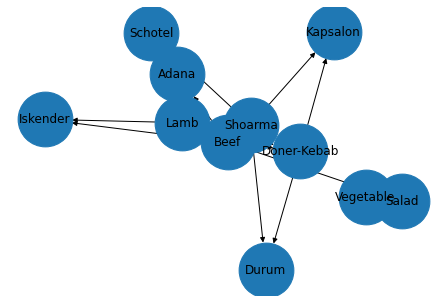

In [38]:
bn = BayesNet(verbose=0)
bn.load_from_bifxml('testing/delicious_food.BIFXML')
bn.draw_structure()

In [39]:
bn.get_all_variables()

['Beef',
 'Lamb',
 'Vegetable',
 'Iskender',
 'Doner-Kebab',
 'Shoarma',
 'Adana',
 'Salad',
 'Schotel',
 'Kapsalon',
 'Durum']

In [40]:
bn.get_all_cpts()

{'Beef':     Beef    p
 0  False  0.1
 1   True  0.9,
 'Lamb':     Lamb    p
 0  False  0.2
 1   True  0.8,
 'Vegetable':    Vegetable    p
 0      False  0.1
 1       True  0.9,
 'Iskender':     Lamb   Beef  Iskender      p
 0  False  False     False  0.004
 1  False  False      True  0.016
 2  False   True     False  0.016
 3  False   True      True  0.064
 4   True  False     False  0.036
 5   True  False      True  0.144
 6   True   True     False  0.144
 7   True   True      True  0.576,
 'Doner-Kebab':     Lamb   Beef  Doner-Kebab     p
 0  False  False        False  0.00
 1  False  False         True  0.02
 2  False   True        False  0.00
 3  False   True         True  0.08
 4   True  False        False  0.00
 5   True  False         True  0.18
 6   True   True        False  0.00
 7   True   True         True  0.90,
 'Shoarma':     Lamb   Beef  Shoarma      p
 0  False  False    False  0.002
 1  False  False     True  0.018
 2  False   True    False  0.008
 3  False   True   

In [41]:
bn.variable_elimination(Q=set(['Shoarma']), order='min_degree_order')

,Shoarma,p
0,False,0.0
1,True,1.0


In [42]:
bn.variable_elimination(Q=set(['Shoarma']), 
                        evidence=pd.Series({"Lamb": False,
                                            "Beef": True}), 
                        order='min_degree_order')


,Shoarma,p
0,False,0.0
1,True,1.0


In [44]:
bn.variable_elimination(Q=set(['Adana']), 
                        evidence=pd.Series({"Lamb": False,
                                            "Beef": True}), 
                        order='min_degree_order')


,Adana,p
0,False,0.142857
1,True,0.857143
